Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


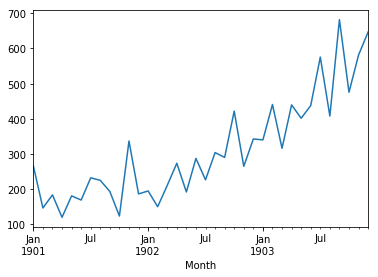

In [1]:
"""
from http://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
"""


from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from pandas import Series

#load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser = parser)


#first rows
print(series.head())

#line plot
series.plot()
pyplot.show()

In [2]:
#train and test set
X = series.values
train, test = X[0:-12], X[-12:]

RMSE: 136.761


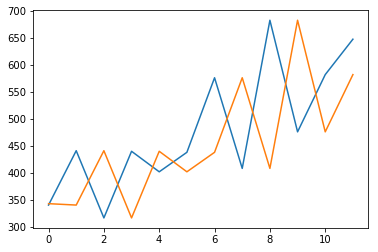

In [3]:
#walk forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    #make prediction
    predictions.append(history[-1])
    #observation
    history.append(test[i])
    
#report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
#line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [4]:
def timeseries_to_supervised(data, lag = 1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis = 1)
    df.fillna(0, inplace=True)
    return df

In [5]:
#transform to supervised
X = series.values
supervised = timeseries_to_supervised(X, 1)
print(supervised)

        0      0
0     0.0  266.0
1   266.0  145.9
2   145.9  183.1
3   183.1  119.3
4   119.3  180.3
5   180.3  168.5
6   168.5  231.8
7   231.8  224.5
8   224.5  192.8
9   192.8  122.9
10  122.9  336.5
11  336.5  185.9
12  185.9  194.3
13  194.3  149.5
14  149.5  210.1
15  210.1  273.3
16  273.3  191.4
17  191.4  287.0
18  287.0  226.0
19  226.0  303.6
20  303.6  289.9
21  289.9  421.6
22  421.6  264.5
23  264.5  342.3
24  342.3  339.7
25  339.7  440.4
26  440.4  315.9
27  315.9  439.3
28  439.3  401.3
29  401.3  437.4
30  437.4  575.5
31  575.5  407.6
32  407.6  682.0
33  682.0  475.3
34  475.3  581.3
35  581.3  646.9


In [6]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [7]:
#invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat+history[-interval]

In [8]:
#transform to be stationary
differenced = difference(series, 1)
print(differenced.head())

inverted = list()
for i in range(len(differenced)):
    value = inverse_difference(series, differenced[i], len(series)-i)
    inverted.append(value)
    
inverted = Series(inverted)
print(inverted.head())

0   -120.1
1     37.2
2    -63.8
3     61.0
4    -11.8
dtype: float64
0    145.9
1    183.1
2    119.3
3    180.3
4    168.5
dtype: float64


In [9]:
from sklearn.preprocessing import MinMaxScaler
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range = (-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())
#invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())


0   -0.478585
1   -0.905456
2   -0.773236
3   -1.000000
4   -0.783188
dtype: float64
0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
dtype: float64
